# Exersice session 3

## Exersice 19: Loyalty Coffee Card

Each morning on your way to Chalmers, you go to a coffee shop with probability $p$ and get a cup of coffee.
With each cup purchased, you get your ''loyalty card'' punched.
After $7$ punches, you redeem your club card on your next visit for one free cup of coffee and then receive a new 
unpunched card.
Let $X_{n}$ denote the number of punches on your card when you wake up on day $n$.
What is $\pi_{k} = \lim_{n\to\infty} \Pr\left[X_{n} = k \right] $ ?

### Solution:

The RV $X_n$ can take on the values in the set $\{ 0,1,2,3,4,5,6,7 \}$. From the text we gather that for $X_{n}$ we have two possiblities $\Pr[X_n = X_{n-1}] = 1-p$ and $\Pr[X_n = X_{n-1} + 1 \text{ mod } 8 ] = p$. From this info we can sketch the Markov chain: (Chain below is WRONG, should be with states 0 to 7, but it looks the same anyway!)

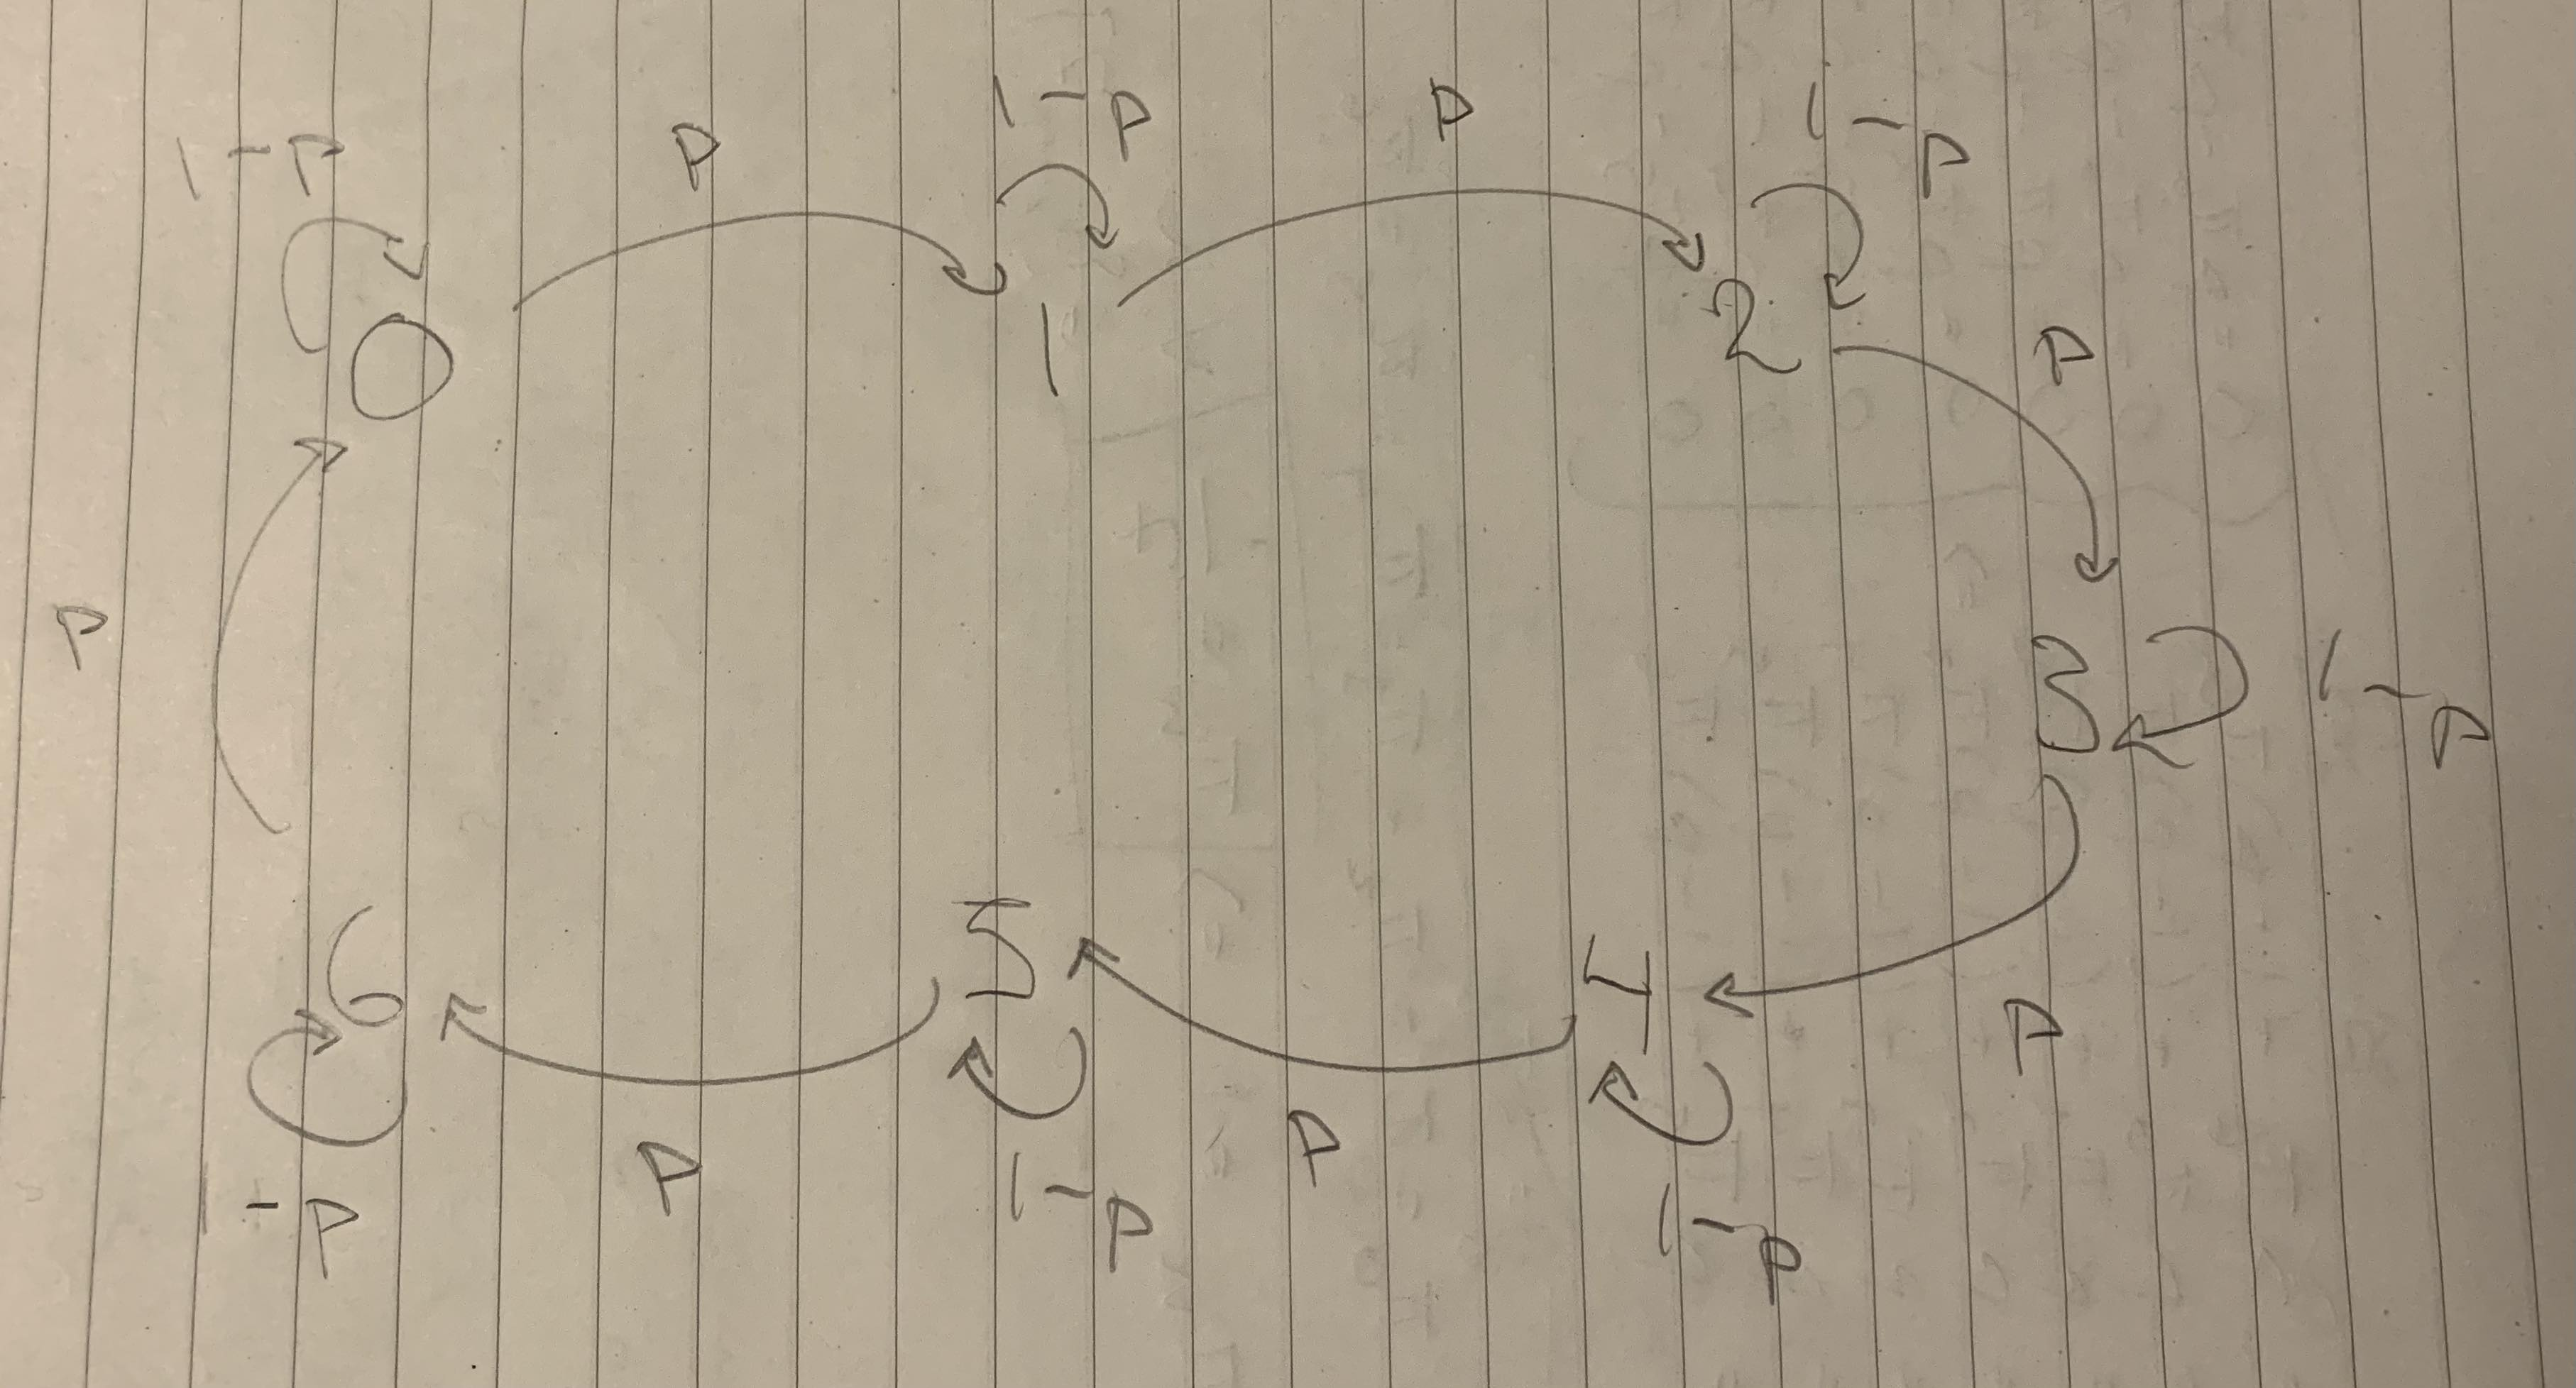

We now need to find the limiting state probability... We use the following theorem:

>#### Thm
(Reformulated) *For an irreducible, aperiodic, finite chain we have $\exists ! \pi$:*
$$
    \pi P = \pi, \quad \sum_k \pi_k = 1, \pi_k \geq 0 \forall k
$$
*where*
$$
    k \in \{0,1,\cdots,K-1\}.
$$

* Irreducible? Yes, all states are accesible from all other states. 
* Aperiodic? Yes, there is no periodic behaviour.
* Finite? Yes.

$\Rightarrow$ There is a unique $\pi$. What is it?

We know $\pi P = \pi$. This gives the following equation system
$$
    \left\{ \begin{matrix}
        \pi_0 = p \pi_7 + (1-p)\pi_0 \\
        \pi_1 = p \pi_0 + (1-p)\pi_1 \\
        \pi_2 = p \pi_1 + (1-p)\pi_2 \\
        \pi_3 = p \pi_2 + (1-p)\pi_3 \\
        \pi_4 = p \pi_3 + (1-p)\pi_4 \\
        \pi_5 = p \pi_4 + (1-p)\pi_5 \\
        \pi_6 = p \pi_5 + (1-p)\pi_6 \\
        \pi_7 = p \pi_0 + (1-p)\pi_7 \\
    \end{matrix} \right. 
    \Rightarrow
    \left\{ \begin{matrix}
        0 = p \pi_7 -p\pi_0 \\
        0 = p \pi_0 -p\pi_1 \\
        0 = p \pi_1 -p\pi_2 \\
        0 = p \pi_2 -p\pi_3 \\
        0 = p \pi_3 -p\pi_4 \\
        0 = p \pi_4 -p\pi_5 \\
        0 = p \pi_5 -p\pi_6 \\
        0 = p \pi_6 -p\pi_7 \\
    \end{matrix} \right. 
$$
$$
\Rightarrow \pi_0 = \pi_1 = \pi_2 = \pi_3 = \pi_4 = \pi_5 = \pi_6 = \pi_7
$$
Using the other property we get the answer
$$
    \sum_k \pi_k = 1 \quad \Rightarrow \pi_k = \frac{1}{8}, k \in \{ 0,1,2,3,4,5,6,7 \}
$$


## Exersice 21: Convenience store
In each one-second interval at a convenience store, a new customer arrives with probability $p$, independent
of the number of customers in the store.
The clerk gives each arriving customer a friendly ''Hello''.
In each unit of time in which there is no arrival, the clerk can provide a unit of service to a waiting 
customer.
Given that a customer has received a unit of service, the customer departs with probability $q$.
When the store is empty, the clerk is idle.
Sketch a Markov chain for the number of customers in the store.
Under which conditions on $p$ and $q$ do limiting state probabilities exist?
Under those conditions, find the limiting state probabilities.

**python**: Let $p = 0.3$ and $q = 0.5$. Initialise $100$ different probability state vectors $\mathbf{p}_{i}(0), \, i \in \{0,\cdots, 99\}$ and run them through the Markov chain for $1000$ steps.  You need to limit the size of $\mathbf{p}_{i}(n)$ i.e. how many states you model. Pick this termination based on $p,q$ and the limiting state probability that you calculated above such that at convergence you will miss less than $10^{-8}$ of the total probability. Plot the final state probability vectors $\mathbf{p}_{i}(1000)$ and compare  them to your limiting state probability.

### Solution:

The sketch of the system can be seen in the following image:


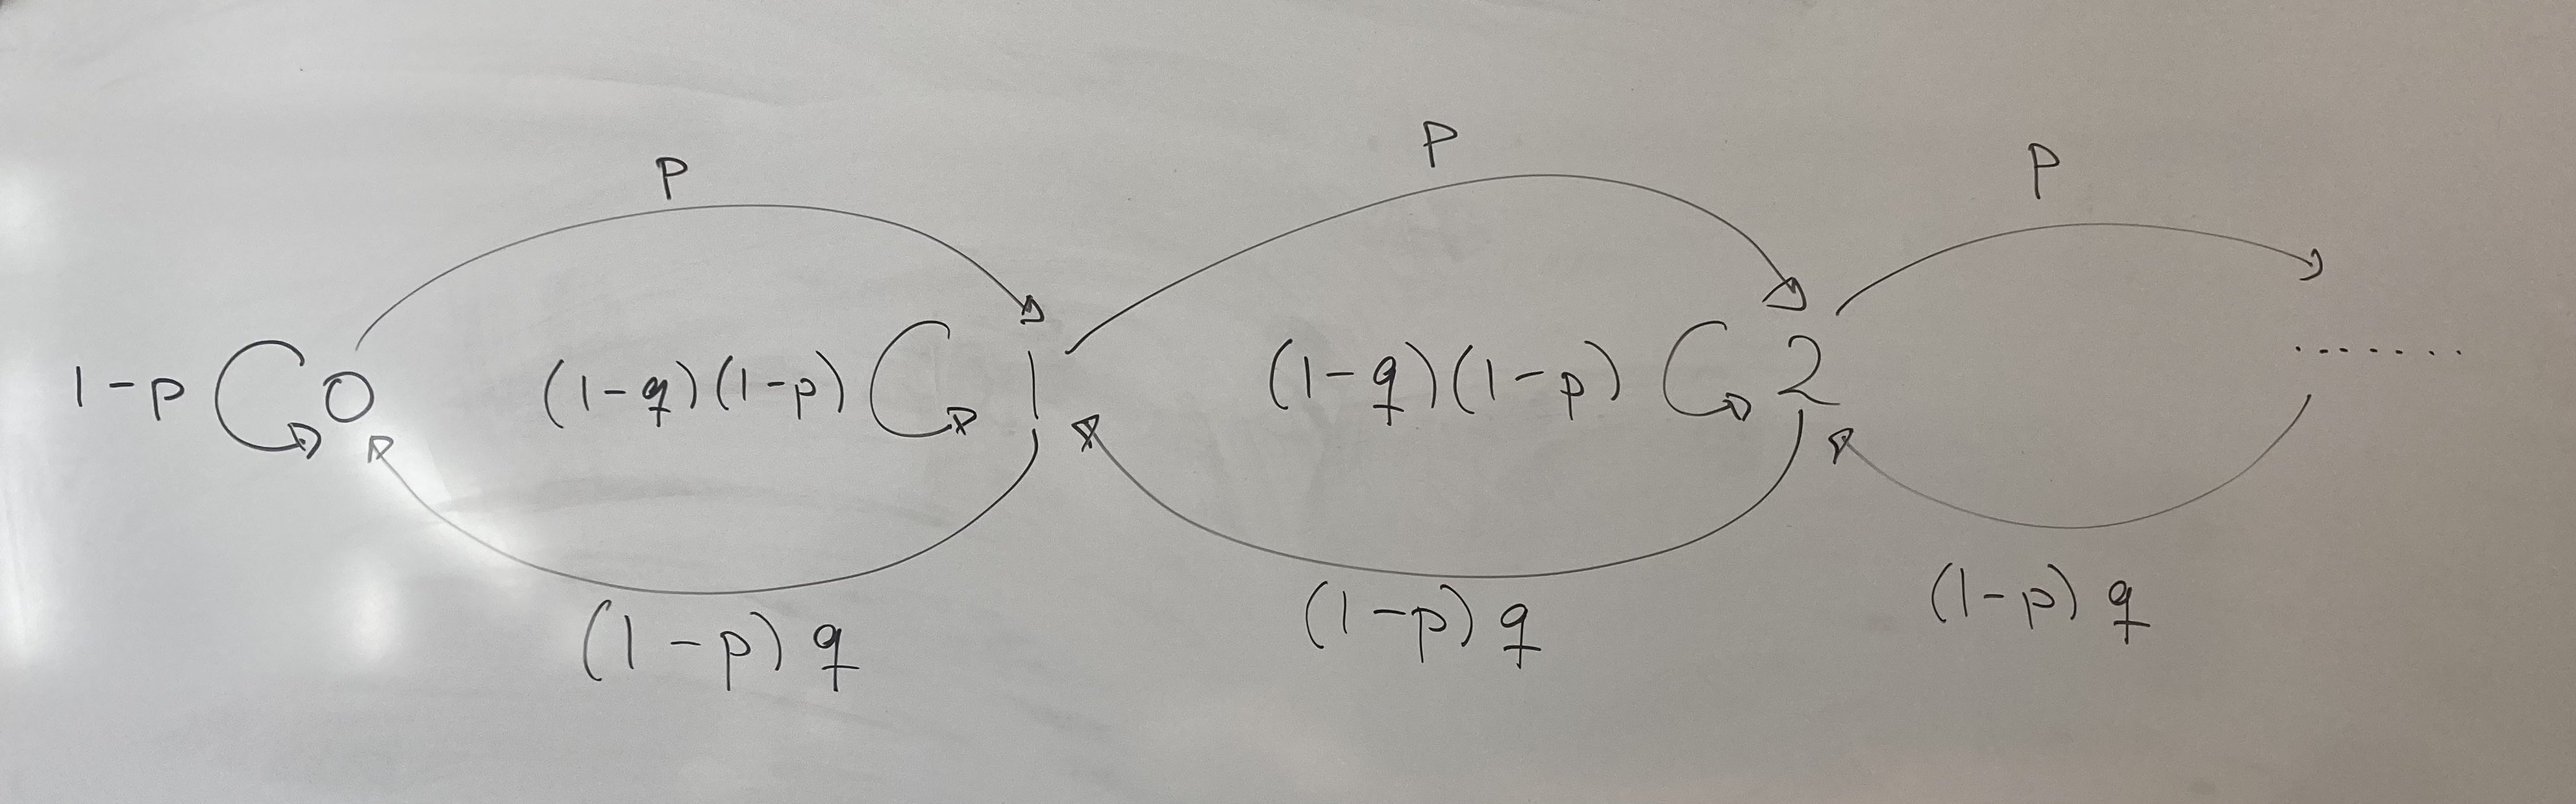

If we want to fomualte this in some mathematical terms we can say that for the number of customers $n$ we have the follwing: For $n=0$
$$
    \Pr[0 \rightarrow 0] = 1-p, \quad \Pr[0 \rightarrow 1] = p,
$$
and for $n>0$
$$
    \Pr[n \rightarrow n] = (1-p)(1-q), \quad \Pr[n \rightarrow n-1] = (1-p)q, \quad \Pr[n \rightarrow n+1] = p.
$$
The chain is aperiodic (no periodicity) and irreducible (one commuting class). 
We can use the following theorem from the book:

> #### Thm
 *For mutually exclusive subsets $S$ and $S'$, we have that*
$$
\sum_{i \in S} \sum_{j \in S'} \pi_{i} P_{ij} = \sum_{j \in S'} \sum_{i \in S} \pi_{j} P_{ji}.       
$$

What does this theorem say? More or less that the 'flow' of probability going between any two subsets should balance if we are at the stationary probability. Makes sense!

Let's apply it! First let $S = \{ 0,1,\cdots i \}$ and $S' = \{ i+1,i+2,\cdots \}$:
$$
    \sum_{j = 0}^{i} \sum_{k = i+1}^\infty \pi_{j} P_{jk} = \sum_{k = i+1}^\infty \sum_{j = 0}^i \pi_{k} P_{kj}.       
$$
Here we observe that for $k \not= i+1, j \not=i \Rightarrow P_{jk} = P_{kj} = 0$. The statement thus simplifies to 
$$
    \pi_i P_{i,i+1} = \pi_{i+1} P_{i+1,i}
$$
$$
    \pi_i p = \pi_{i+1} (1-p)q
$$
$$
    \pi_{i+1} = \frac{p}{(1-p)q} \pi_i.
$$
For notational ease, let $\alpha = \frac{p}{(1-p)q}$. Applying this formula recursivelly we get $\pi_i = \pi_0 \alpha^i$. Now we are almost done, but we need one more condition. We use
$$
    \sum_i \pi_i = 1 \Rightarrow \pi_0 \sum_i \alpha^i = 1.
$$
For the above summation we have that 
$$
    \sum_{i=0}^{\infty} \alpha^i = \frac{1}{1-\alpha}, \quad \text{if } |\alpha| < 1.
$$
In this case we can show 
$$
    \pi_i = \alpha^i (1-\alpha).
$$
The condition for the series to converge can be rewritten as (realising we already have $\alpha \geq 0$)
$$
    p < (1-p) q,
$$
which provides a nive meaning, namely 'It is more likely that a customer leaves than it is for a new one to come in'.

We now move on to the python part with $p = 0.3$ and $q = 0.5$. We note that these fulfill the condition:
$$
    0.3 < (1-0.3) 0.5 = 0.35.
$$
We should also pick the termination such that at convergence you will miss less than $10^{-8}$ of the total probability. We thus wish to find a $N_s$ such that
$$
    \sum_{i=n_s}^\infty \pi_i < 10^{-8}
$$
We note that $pi_i$ is strictly decreasing in $i$ and we can thus find the limit by solving
$$
    \sum_{i=n_s}^\infty \pi_i = 10^{-8}
$$
for $n_s$ and rounding up at the end. Simplifying we get
$$
    \alpha^{n_s} (1-\alpha) \sum_{i=0}^\infty \alpha^i = 10^{-8}
$$
$$
    \alpha^{n_s} (1-\alpha) \frac{1}{1-\alpha} = 10^{-8}
$$
$$
    \Rightarrow n_s = \frac{ -8 }{\log_{10}(\alpha)} \approx 119.4979
$$
Rounding up we get that our limit should be 
$$
    n_s = 120
$$

100
120


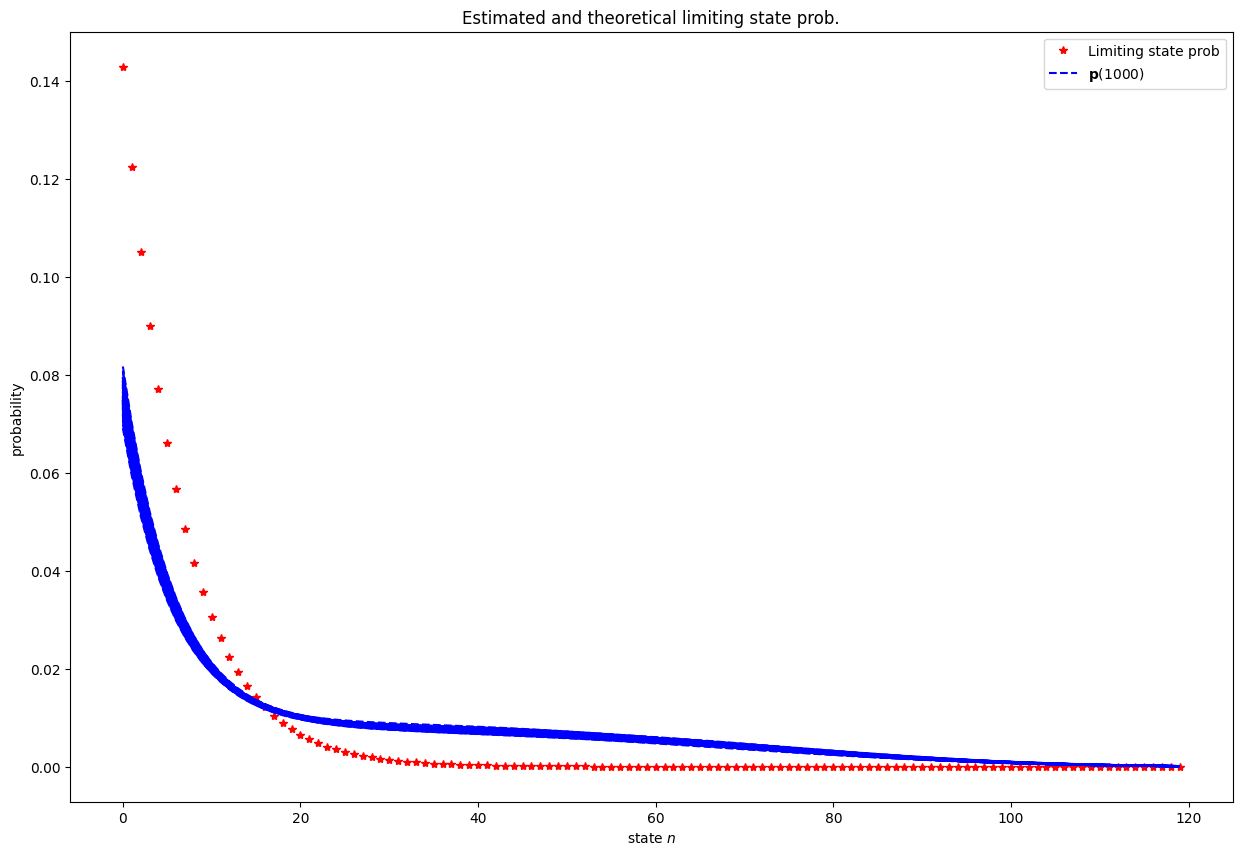

In [20]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.3
q = 0.5
n_vec = 100
n_state = 120
n_iter = 1000

alpha = p/(1-p)/q

# Generate random p_0
p_0 = np.random.random(size=(n_vec,n_state))
# Normalise
p_0 = np.transpose(np.transpose(p_0)/np.sum(p_0,axis=1))

p_n_iter = np.zeros(shape=p_0.shape)
p_prev = np.zeros(shape=p_0.shape)
p_prev = p_0

for _ in range(n_iter):
    # state 0
    p_n_iter[:,0] = p_prev[:,0]*( 1-p ) + p_prev[:,1]*(1-p)*q
    # state n_state, termination state
    p_n_iter[:,-1] = p_prev[:,-1]*( 1-(1-p)*q) + p_prev[:,-2]*p
    for i in range(1,n_state-1):
        p_n_iter[:,i] = ( p_prev[:,i]*(1-p)*(1-q) + 
            p_prev[:,i+1]*(1-p)*q + p_prev[:,i-1]*p )
    p_prev = p_n_iter
    # combat growth/shrinkage from float not being precise enough
    p_prev = np.transpose(np.transpose(p_prev)/np.sum(p_prev,axis=1))

p_avg = np.mean(p_n_iter,axis=0)       
print(len(p_n_iter))
print(len(p_n_iter[1]))

pi_th = (1-alpha)*alpha**np.arange(n_state)

fig = plt.figure(figsize = [15,10])
plt.plot(pi_th,'r*')
# plt.plot(p_n_iter,'b--')
plt.plot(np.transpose(p_n_iter),'b--')
plt.xlabel('state $n$')
plt.ylabel('probability')
plt.title('Estimated and theoretical limiting state prob.')
plt.legend(['Limiting state prob','$\mathbf{p}(1000)$'])

plt.show()

We see here that the number of iterations is too low to reach the limiting state probability. But it certainly looks like we are heading that way. If we increaser $n_\text{iter}$ to 2000 or 3000 we see it gets a lot closer. 